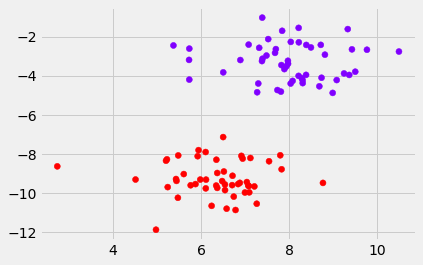

In [5]:
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification,make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def load_initial_graph(dataset,ax):
    if dataset == "Binary":
        X, y = make_blobs(n_features=2, centers=2,random_state=6)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y
    elif dataset == "Multiclass":
        X,y = make_blobs(n_features=2, centers=3,random_state=2)
        ax.scatter(X.T[0], X.T[1], c=y, cmap='rainbow')
        return X,y

def draw_meshgrid():
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    return XX, YY, input_array


plt.style.use('fivethirtyeight')

st.sidebar.markdown("# Logistic Regression Classifier")

dataset = st.sidebar.selectbox(
    'Select Dataset',
    ('Binary','Multiclass')
)

penalty = st.sidebar.selectbox(
    'Regularization',
    ('l2', 'l1','elasticnet','none')
)

c_input = float(st.sidebar.number_input('C',value=1.0))

solver = st.sidebar.selectbox(
    'Solver',
    ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
)

max_iter = int(st.sidebar.number_input('Max Iterations',value=100))

multi_class = st.sidebar.selectbox(
    'Multi Class',
    ('auto', 'ovr', 'multinomial')
)

l1_ratio = int(st.sidebar.number_input('l1 Ratio'))

# Load initial graph
fig, ax = plt.subplots()

# Plot initial graph
X,y = load_initial_graph(dataset,ax)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
orig = st.pyplot(fig)

if st.sidebar.button('Run Algorithm'):
    orig.empty()

    clf = LogisticRegression(penalty=penalty,C=c_input,solver=solver,max_iter=max_iter,multi_class=multi_class,l1_ratio=l1_ratio)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    XX, YY, input_array = draw_meshgrid()
    labels = clf.predict(input_array)

    ax.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='rainbow')
    plt.xlabel("Col1")
    plt.ylabel("Col2")
    orig = st.pyplot(fig)
    st.subheader("Accuracy for Decision Tree  " + str(round(accuracy_score(y_test, y_pred), 2)))

In [3]:
!pip install streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.17.3 which is incompatible.


  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=2effb77af498b7dfbb904453821496cf8d3a3e8f3be31c4395c2adafb1bfb16b
  Stored in directory: c:\users\soham\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.3
    Uninstalling protobuf-4.22.3:
      Successfully uninstalled protobuf-4.22.3
